# Upload the file dsvdd.zip in google colab

In [ ]:
!unzip dsvdd.zip

Archive:  dsvdd.zip
   creating: dsvdd/
  inflating: dsvdd/__init__.py       
  inflating: dsvdd/datasets.py       
  inflating: dsvdd/deepSVDD.py       
  inflating: dsvdd/networks.py       
  inflating: dsvdd/utils.py          


In [ ]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)

TensorFlow 1.x selected.
1.15.2


Instructions for updating:
If using Keras pass *_constraint arguments to layers.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



11493376/11490434 [==============================] - 0s 0us/step



  4%|▍         | 2/53 [00:00<00:03, 13.24it/s]

Epoch:   0 AUROC: 0.548


  4%|▍         | 2/53 [00:00<00:03, 13.02it/s]

Epoch:   1 AUROC: 0.547


  4%|▍         | 2/53 [00:00<00:03, 13.41it/s]

Epoch:   2 AUROC: 0.547


  4%|▍         | 2/53 [00:00<00:03, 13.20it/s]

Epoch:   3 AUROC: 0.547


  4%|▍         | 2/53 [00:00<00:03, 13.21it/s]

Epoch:   4 AUROC: 0.547


  4%|▍         | 2/53 [00:00<00:03, 13.28it/s]

Epoch:   5 AUROC: 0.547


  4%|▍         | 2/53 [00:00<00:03, 13.32it/s]

Epoch:   6 AUROC: 0.547


  4%|▍         | 2/53 [00:00<00:04, 12.01it/s]

Epoch:   7 AUROC: 0.547


  4%|▍         | 2/53 [00:00<00:03, 13.21it/s]

Epoch:   8 AUROC: 0.547


100%|██████████| 53/53 [00:04<00:00, 13.12it/s]


Epoch:   9 AUROC: 0.547
AUROC: 0.547


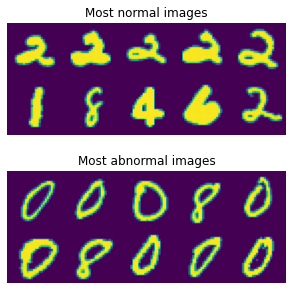

In [ ]:
from dsvdd import *
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from tensorflow.python.framework import ops

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'


def main(cls=1):
    ops.reset_default_graph()
    from dsvdd.utils import plot_most_normal_and_abnormal_images
    # build model and DeepSVDD
    keras_model = mnist_lenet(32)
    svdd = DeepSVDD(keras_model, input_shape=(28, 28, 1), representation_dim=32,
                    objective='soft-boundary')

    # get dataset
    X_train, X_test, y_test = get_mnist(cls)

    # train DeepSVDD
    svdd.fit(X_train, X_test, y_test, epochs=10, verbose=True)

    # test DeepSVDD
    score = svdd.predict(X_test)
    auc = roc_auc_score(y_test, -score)
    print('AUROC: %.3f' % auc)

    plot_most_normal_and_abnormal_images(X_test, score)
    plt.show()


if __name__ == '__main__':
    main()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 11, 11, 32)        2400      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 11, 11, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          51200     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 4, 4, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 64)          256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 128)         2

  2%|▎         | 1/40 [00:00<00:04,  9.67it/s]

Epoch:   0 AUROC: 0.484


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch:   1 AUROC: 0.473


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch:   2 AUROC: 0.375


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch:   3 AUROC: 0.352


  2%|▎         | 1/40 [00:00<00:04,  9.50it/s]

Epoch:   4 AUROC: 0.346


  2%|▎         | 1/40 [00:00<00:04,  9.38it/s]

Epoch:   5 AUROC: 0.345


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch:   6 AUROC: 0.326


  0%|          | 0/40 [00:00<?, ?it/s]

Epoch:   7 AUROC: 0.328


  2%|▎         | 1/40 [00:00<00:04,  9.60it/s]

Epoch:   8 AUROC: 0.357


100%|██████████| 40/40 [00:04<00:00,  9.72it/s]


Epoch:   9 AUROC: 0.356
AUROC: 0.356


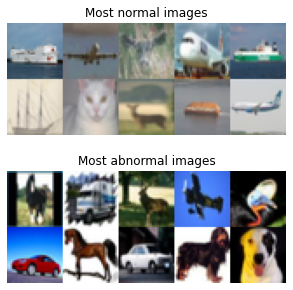

In [ ]:
from dsvdd import *
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from tensorflow.python.framework import ops

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'


def main(cls=1):
    ops.reset_default_graph()
    from dsvdd.utils import plot_most_normal_and_abnormal_images
    # build model and DeepSVDD
    keras_model = cifar_lenet(128)
    keras_model.summary()
    svdd = DeepSVDD(keras_model, input_shape=(32, 32, 3), representation_dim=128,
                    objective='one-class')

    # get dataset
    X_train, X_test, y_test = get_cifar10(cls)

    # train DeepSVDD
    svdd.fit(X_train, X_test, y_test, epochs=10, verbose=True)

    # test DeepSVDD
    score = svdd.predict(X_test)
    auc = roc_auc_score(y_test, -score)
    print('AUROC: %.3f' % auc)

    plot_most_normal_and_abnormal_images(X_test, score)
    plt.show()


if __name__ == '__main__':
    main()
